<a href="https://colab.research.google.com/github/eddydq/ELE2700/blob/main/ELE2700_102_TP1_intro_A2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Département de génie électrique - Polytechnique Montréal

Analyse des signaux - ELE2700

TP1 version 3.0: A2025

Numéro d'équipe: #102

Noms, prénoms et matricules:

Machraoui, Simon : 2487824

Beaumier, Édouard : 2087482


# $\color{#18a2f2}{\textbf{TP1 - Exercices}}$

## $\color{#03fc9d}{\textbf{Exercice 2, devoir (12pt/20):}}$

$\color{orange}{\text{a) [code]}}$ Générez le signal suivant:

$$w(t) = \sum_{n\in\mathbb{Z}}\tilde{\Lambda}( t-nT) + \sum_{n\in\mathbb{Z}}\tilde{\Pi}( t-nT),$$
où,

\begin{align*}
\tilde{\Lambda}( t)&= \begin{cases}
\frac{2}{\alpha T}t-1, &\text{ si } 0 \leq t < \alpha T\\
\frac{1+\alpha}{1-\alpha}-\frac{2}{(1-\alpha)T}t, &\text{ si } \alpha T \leq t < T\\
0, &\text{ sinon,}\end{cases}\\
\tilde{\Pi}(t) &= \begin{cases}
\frac{2}{\alpha T}, &\text{ si } 0 \leq t < \alpha T\\
\frac{-2}{(1-\alpha)T}, &\text{ si } \alpha T \leq t < T\\
0, &\text{ sinon,}\end{cases}
\end{align*}

où $\alpha = \frac{1}{4}$ et $T$ est donnée par $T = \frac{4}{m}$ et $m$ est le numéro de l'équipe au sein du groupe de lab., e.g., pour l'équipe 312: $T_{312} = \frac{4}{12} = \frac{1}{3}$.

$\color{red}{\textbf{(1pt/20)}}$

> **Indice**: La fonction `def` de python et l'opérateur modulo `%` peuvent vous être utile.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 1/4
m = 2  # equipe

# Periode
T = 4/m

# fonction lamda_tilde
def lambda_tilde(t, T, alpha):
    t_prime = t % T
    if 0 <= t_prime < alpha * T:
        return (2 / (alpha * T)) * t_prime - 1
    elif alpha * T <= t_prime < T:
        return ((1 + alpha) / (1 - alpha)) - (2 / ((1 - alpha) * T)) * t_prime
    else:
        return 0

# fonction pi_tilde
def pi_tilde(t, T, alpha):
    t_prime = t % T
    if 0 <= t_prime < alpha * T:
        return 2 / (alpha * T)
    elif alpha * T <= t_prime < T:
        return -2 / ((1 - alpha) * T)
    else:
        return 0

# Define the function for w(t)
def w(t, T, alpha):
    return lambda_tilde(t, T, alpha) + pi_tilde(t, T, alpha)

# vecteur temps
f_s = 10000
t_start = 0
t_stop = 3 * T
t_vec = np.arange(start = t_start, stop = t_stop, step = 1/f_s)

# Generer signal w(t)
w_signal = np.array([w(ti, T, alpha) for ti in t_vec])

$\color{orange}{\text{b) [code]}}$ Tracez ce signal avec matplotlib. Assurez vous d'avoir une légende et d'ajuster les axes pour bien voir le signal. $\color{red}{\textbf{(1pt/20)}}$


> **Indice**:
> Tracez aussi chaque composante du signal pour mieux concevoir comment obtenir les coefficients de la série de Fourier en (d).
>

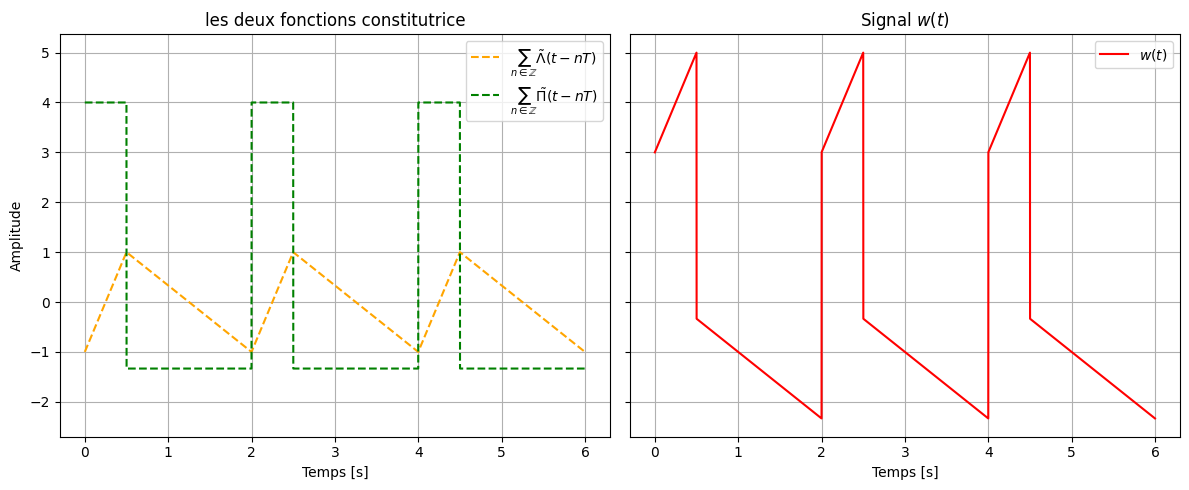

In [27]:
# Écrivez votre code ici pour b)

A_signal = np.array([lambda_tilde(ti, T, alpha) for ti in t_vec])
S_signal = np.array([pi_tilde(ti, T, alpha) for ti in t_vec])

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- A_signal et S_signal ---
axes[0].plot(t_vec, A_signal, label=r"$\sum_{n\in\mathbb{Z}}\tilde{\Lambda}( t-nT)$", color="orange", linestyle="dashed")
axes[0].plot(t_vec, S_signal, label=r"$\sum_{n\in\mathbb{Z}}\tilde{\Pi}( t-nT)$", color="green", linestyle="dashed")
axes[0].grid()
axes[0].set_xlabel("Temps [s]")
axes[0].set_ylabel("Amplitude")
axes[0].set_title("les deux fonctions constitutrice")
axes[0].legend()

# --- w_signal ---
axes[1].plot(t_vec, w_signal, label=r"$w(t)$", color="red", linestyle="solid")
axes[1].grid()
axes[1].set_xlabel("Temps [s]")
axes[1].set_title("Signal $w(t)$")
axes[1].legend()

plt.tight_layout()
plt.show()


$\color{orange}{\text{c) [code]}}$ Obtenez, avec scipy, la fft du signal. En utilisant fftshift et les mesures appropriées, affichez la fft avec matplotlib. $\color{red}{\textbf{(2pt/20)}}$
> **Note**: Combinez les parties réelles et imaginaires de la fft en prenant sa valeur absolue.

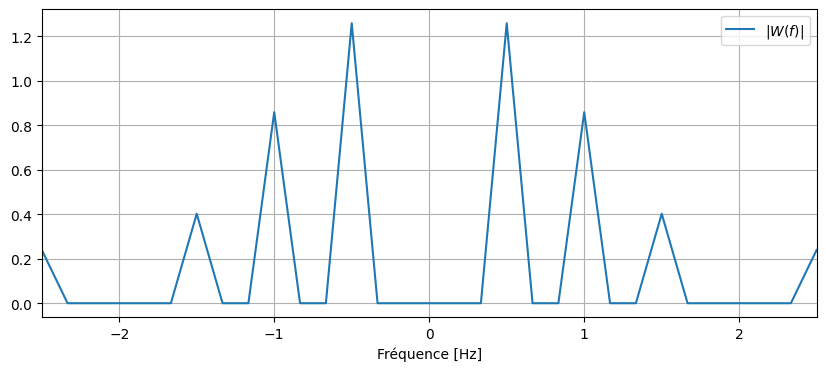

In [28]:
from scipy.fft import fft, fftshift

N = w_signal.size
W = fftshift(fft(w_signal, n=N))
f_axis = np.arange(-N/2, N/2) * f_s / N

plt.figure(figsize=(10,4))
plt.plot(f_axis, np.abs(W)/N, label=r"$|W(f)|$")
plt.grid(); plt.legend(); plt.xlabel("Fréquence [Hz]")
plt.xlim([-5/T, 5/T])      # centré autour des harmoniques de f0 = 1/T
plt.show()


$\color{orange}{\text{d) [Photos dans case texte]}}$ Obtenez théoriquement les coefficients de la SF de votre signal. Utilisez la forme à base exponentielle et prenez la valeur absolue des coefficients. Donnez votre démarche. $\color{red}{\textbf{(7pt/20)}}$

> Indice: Utilisez les propriétés des séries de Fourier pour simplifier votre démarche.

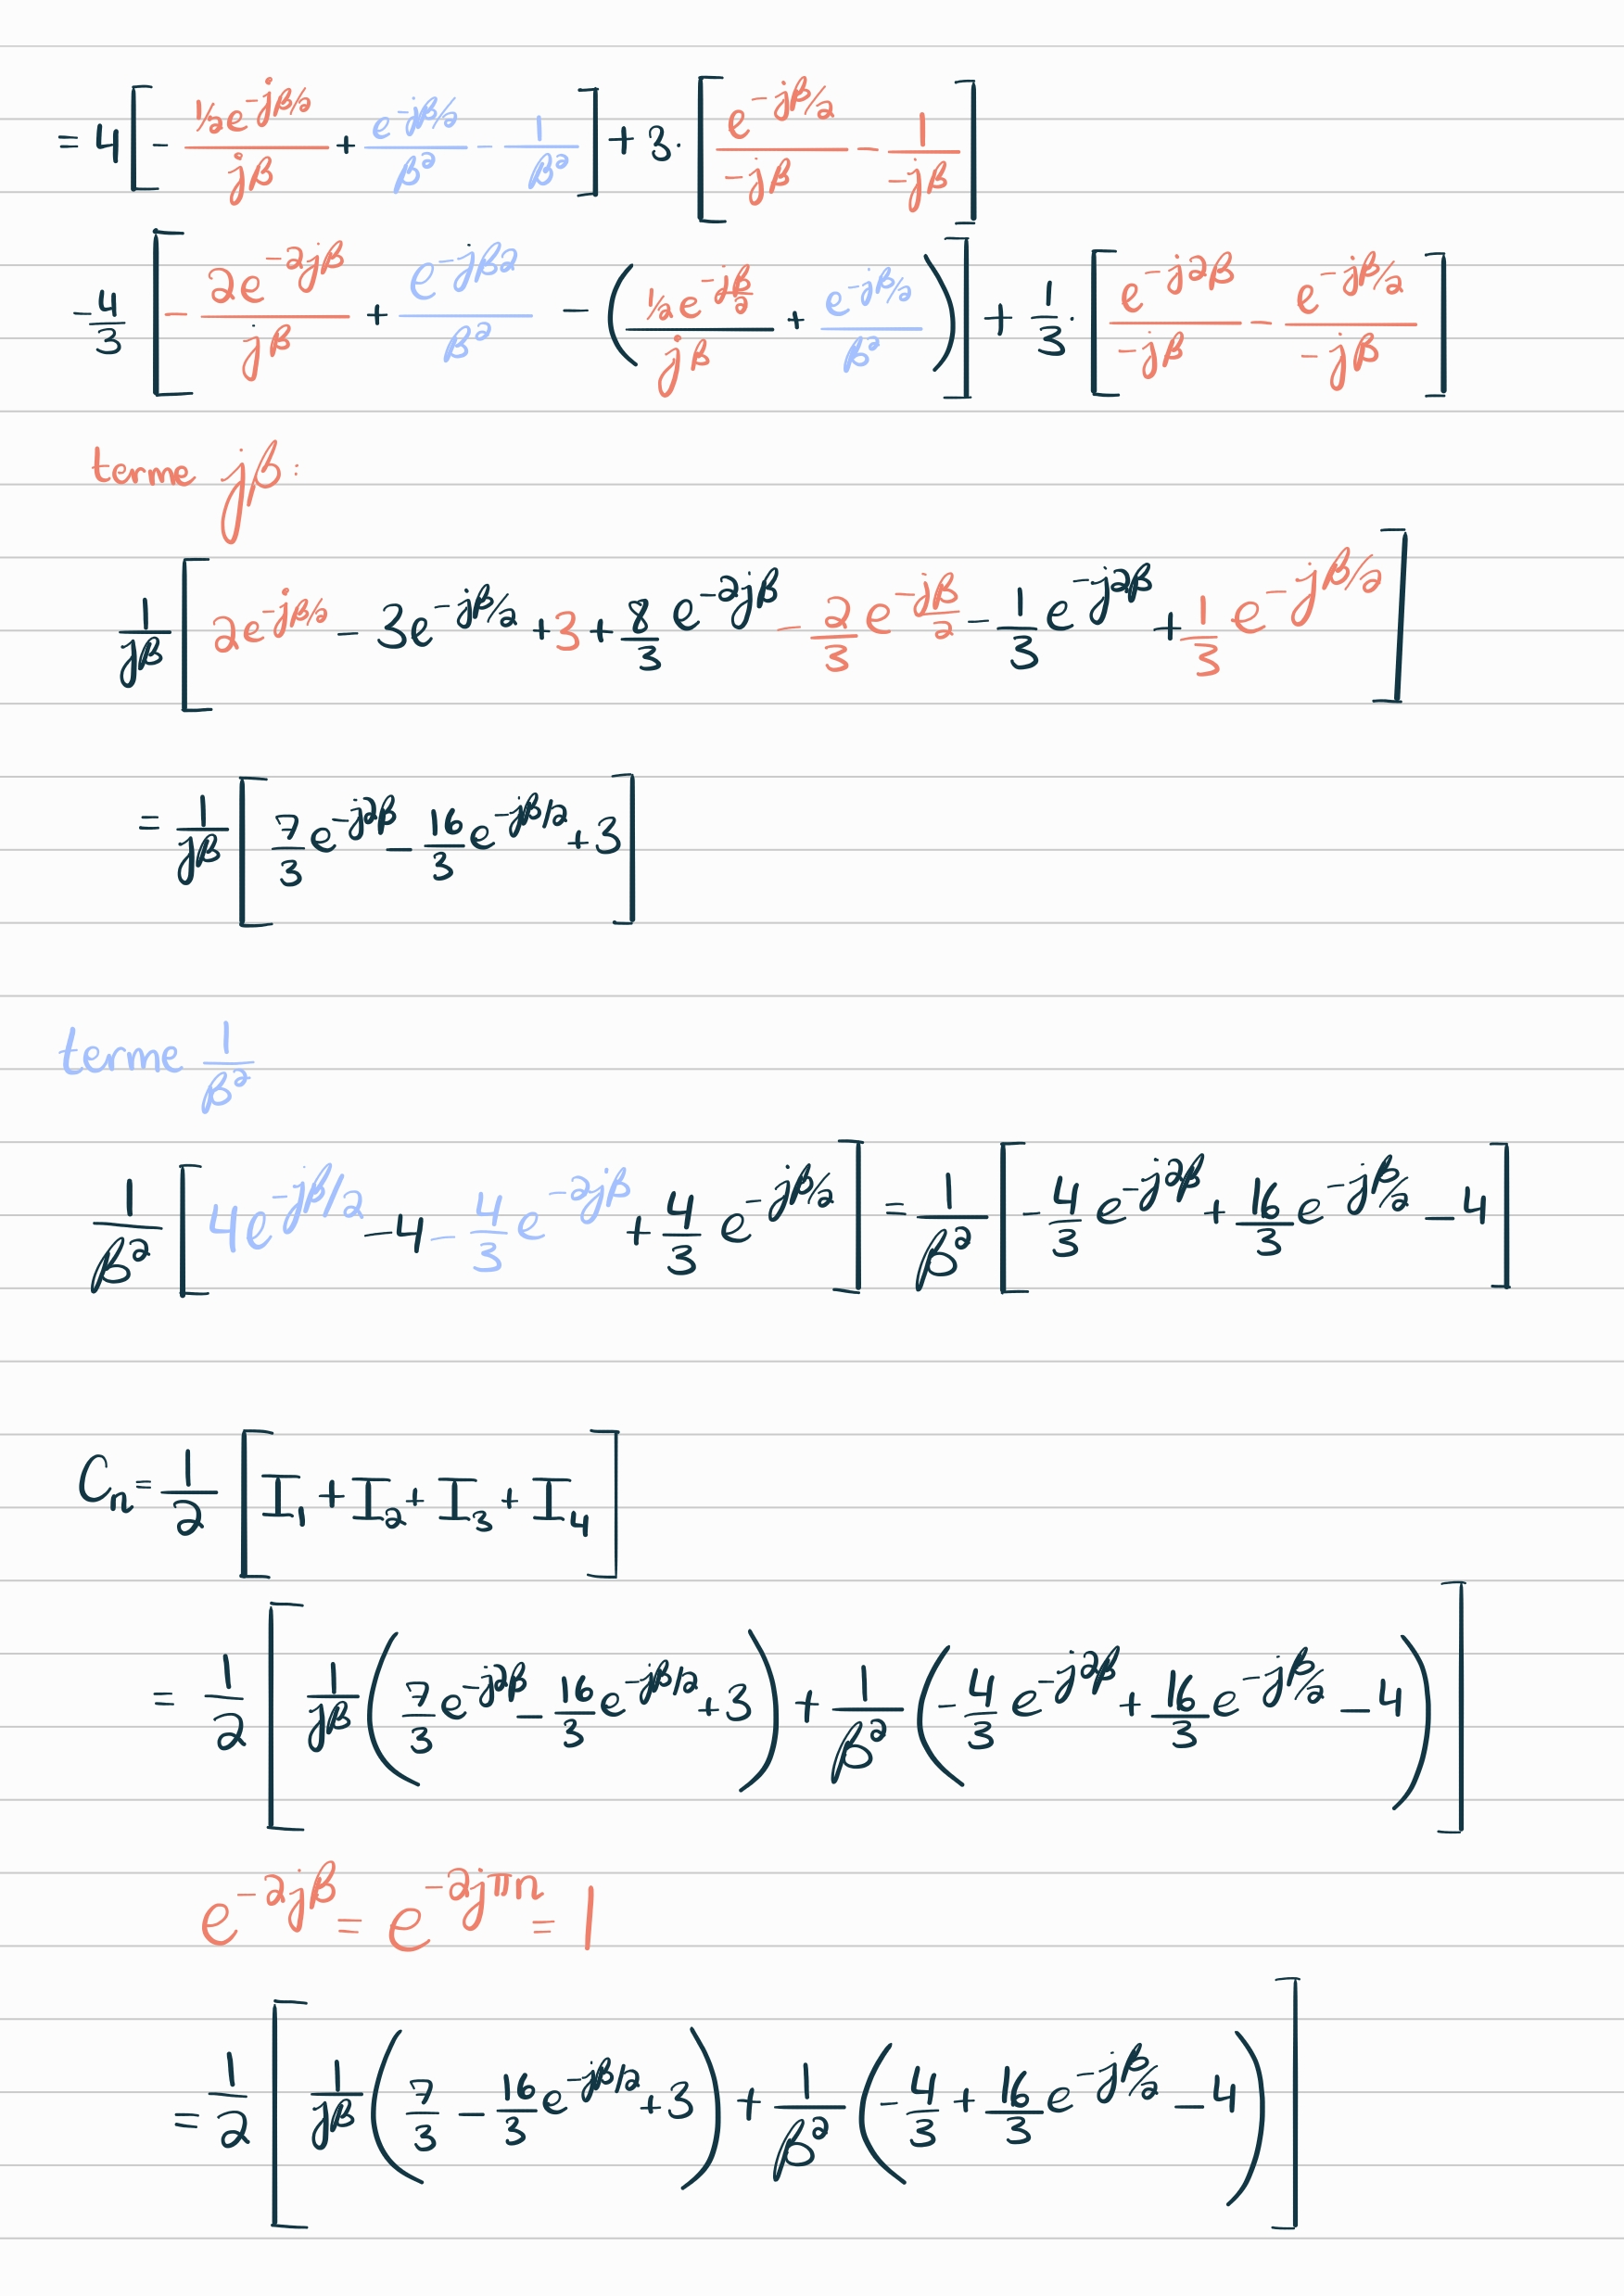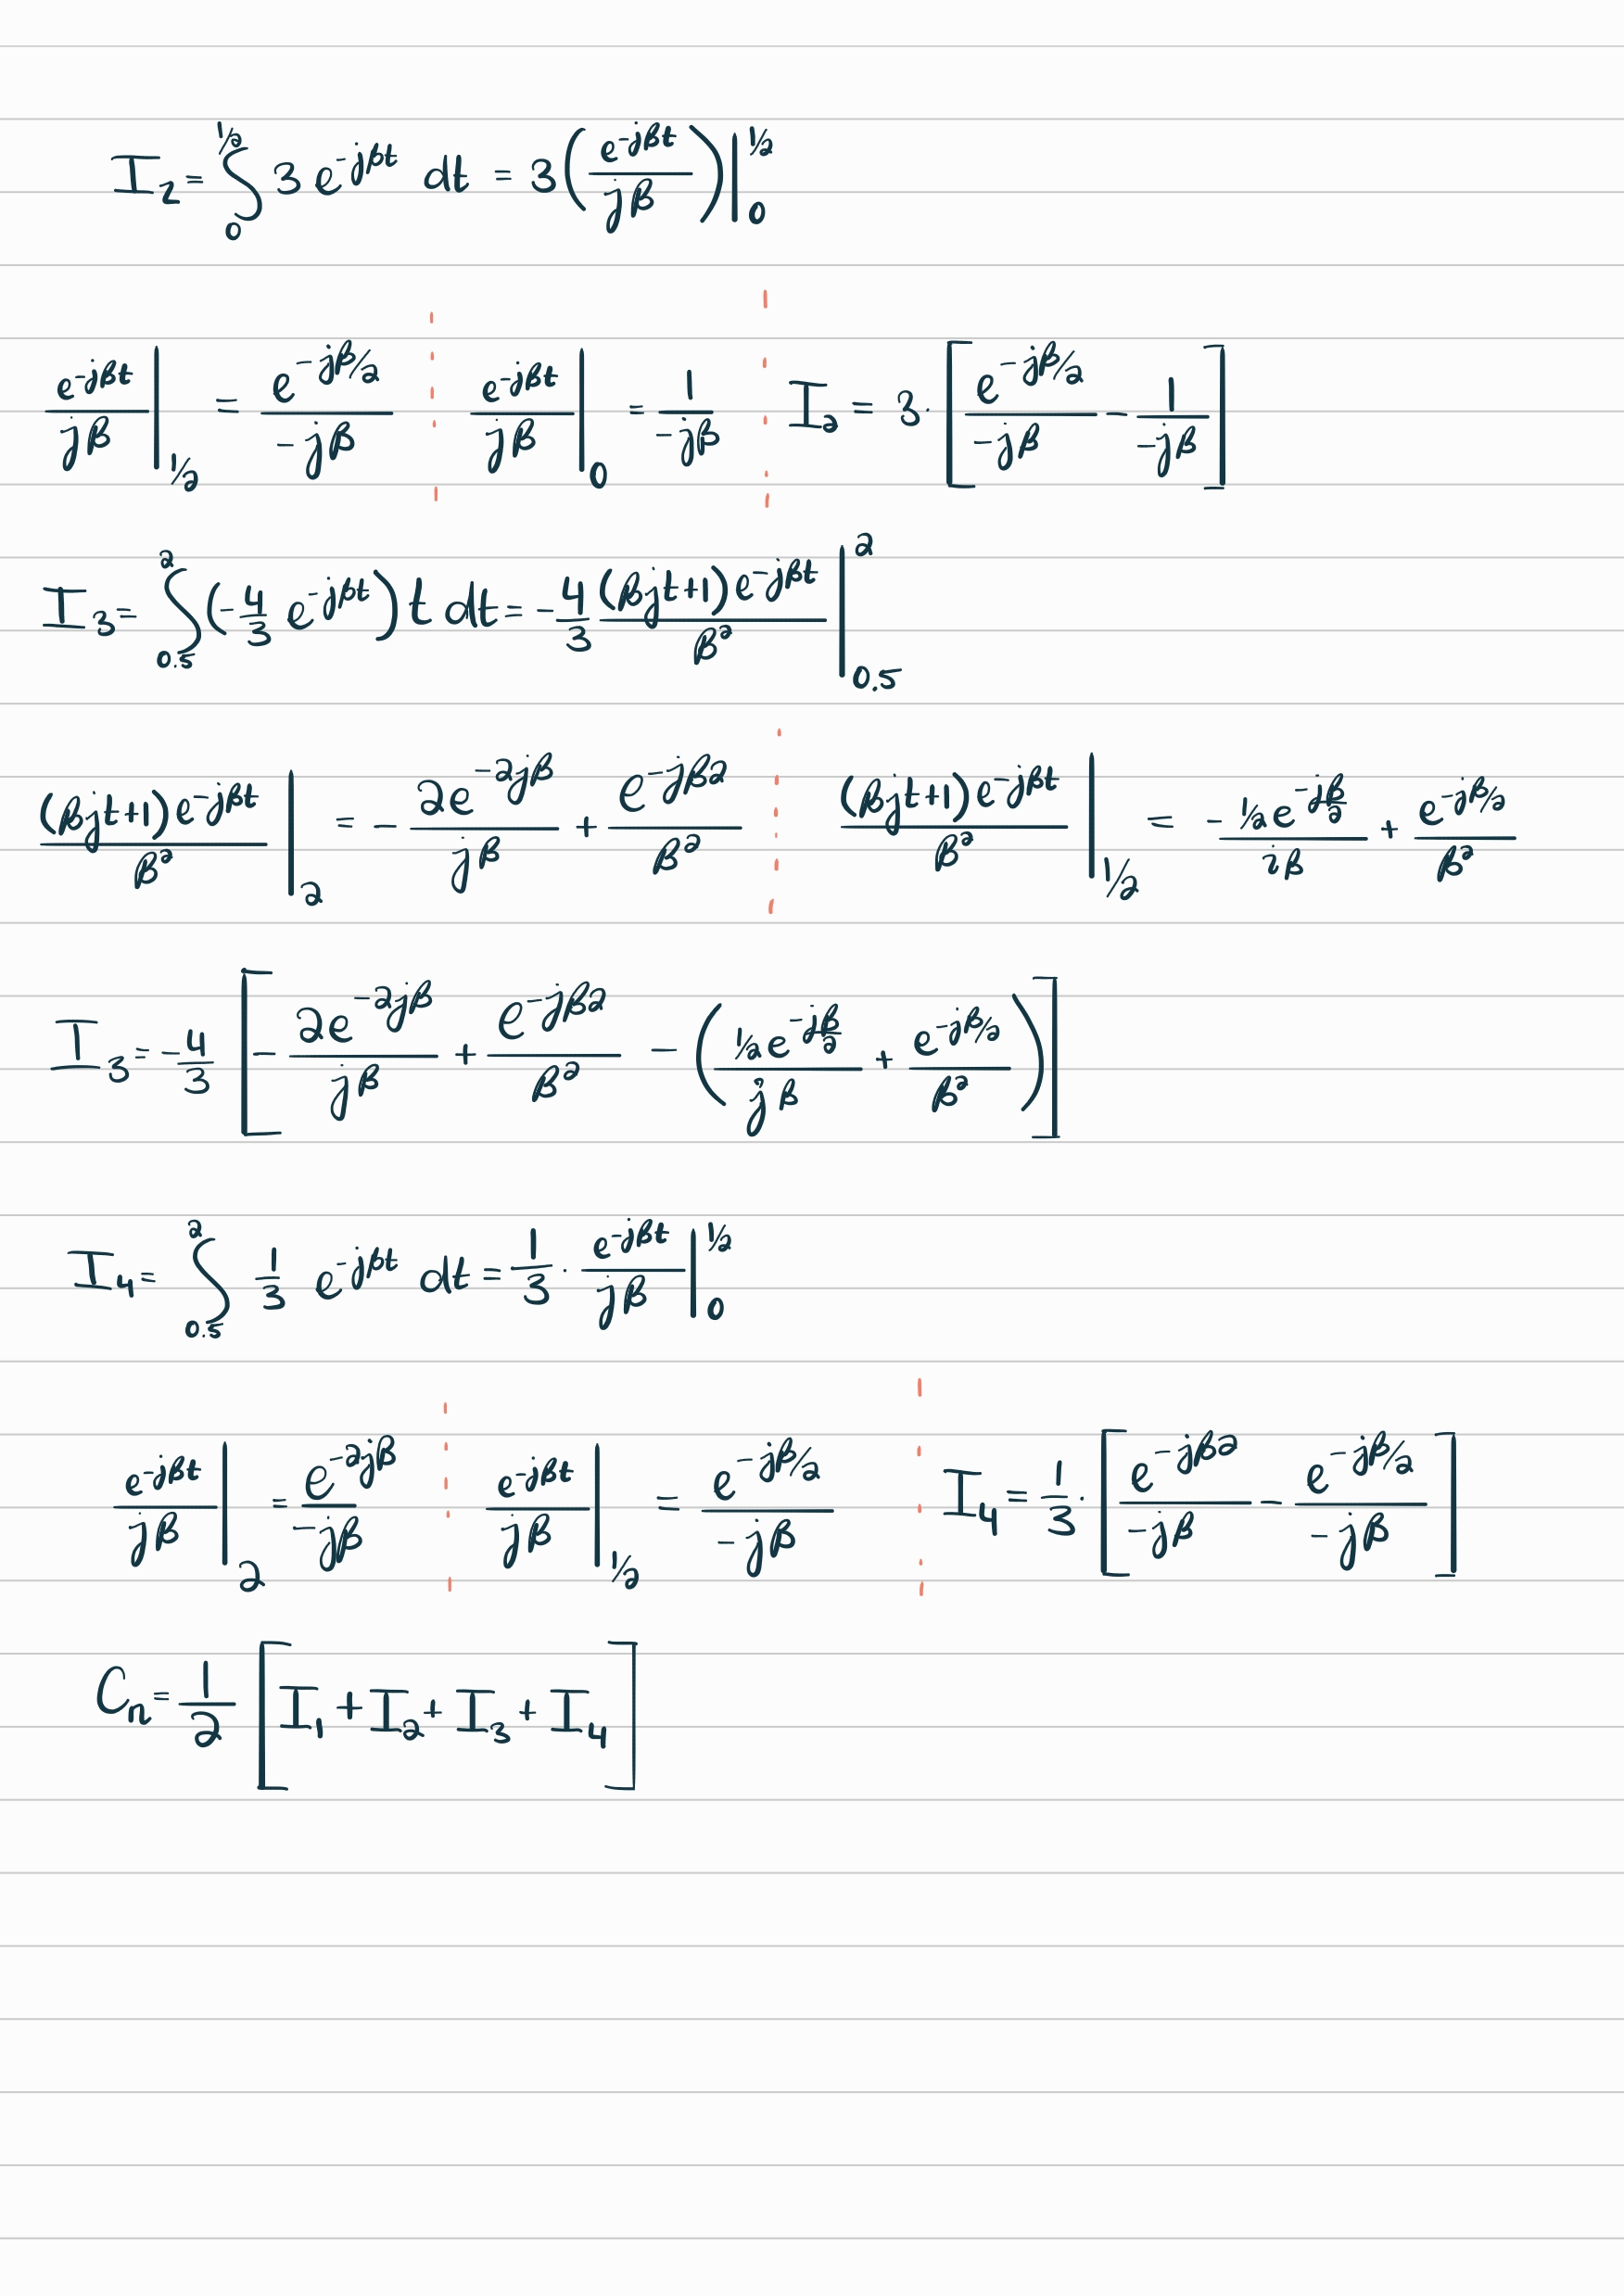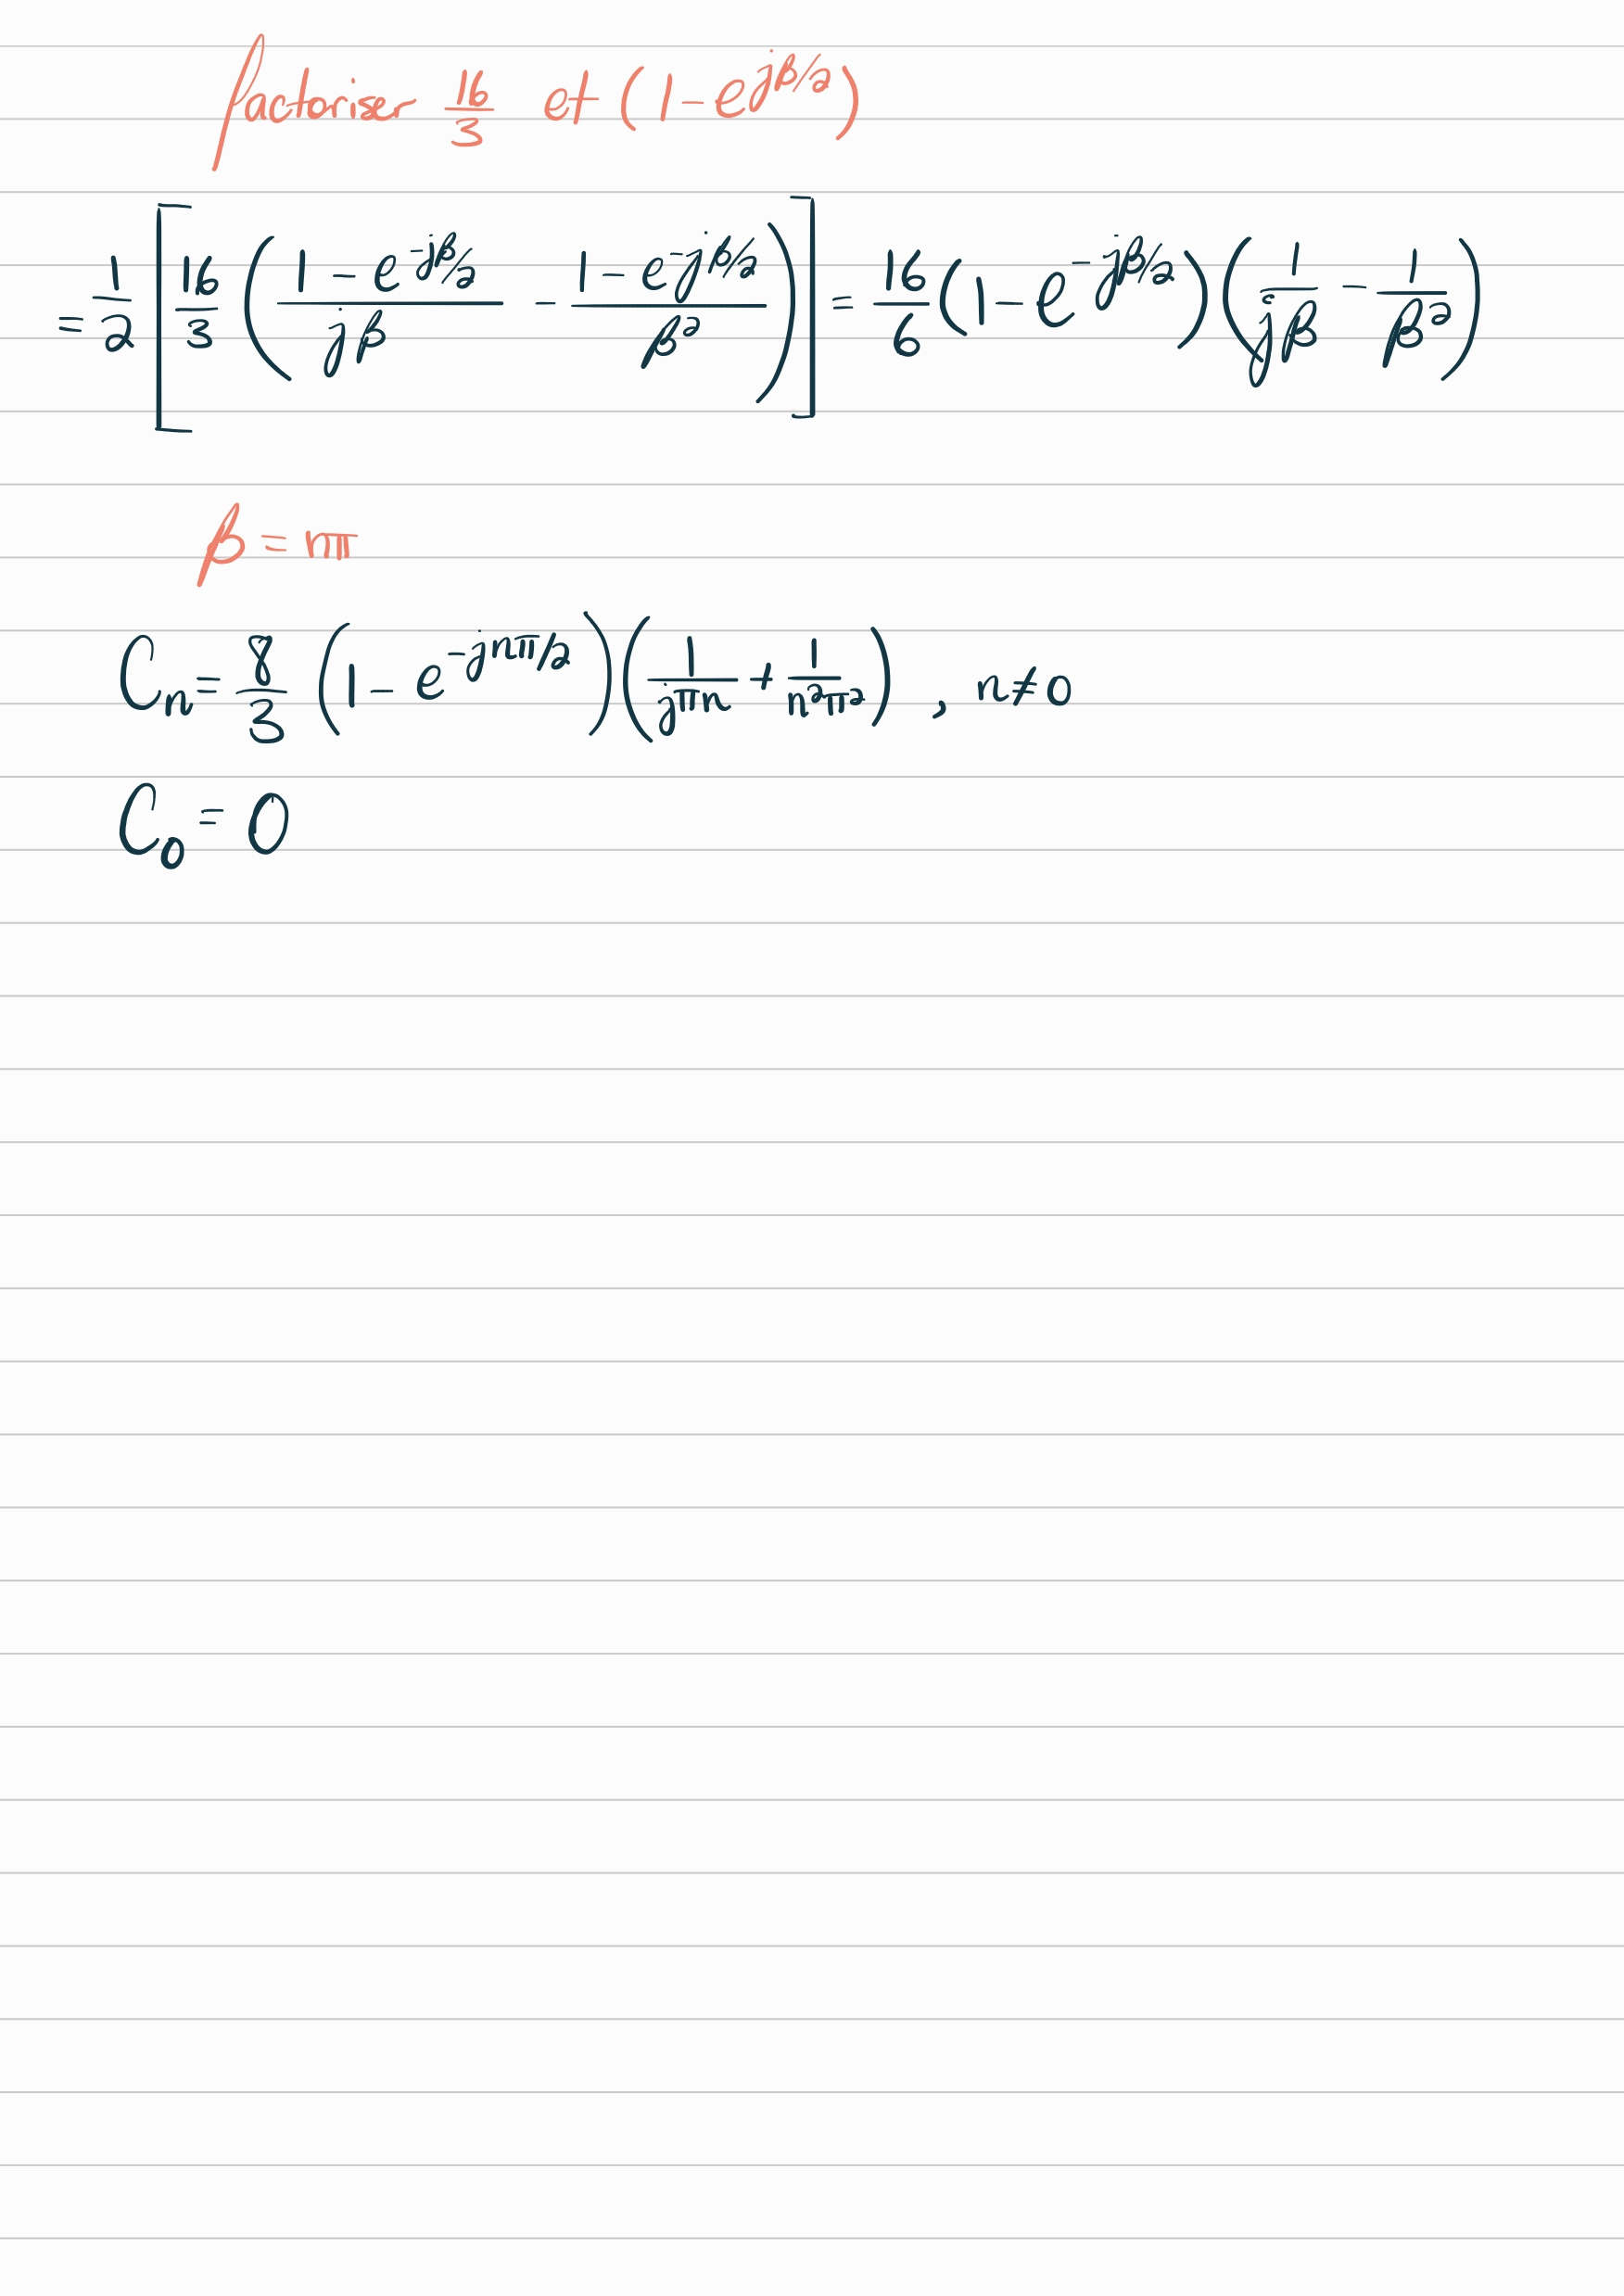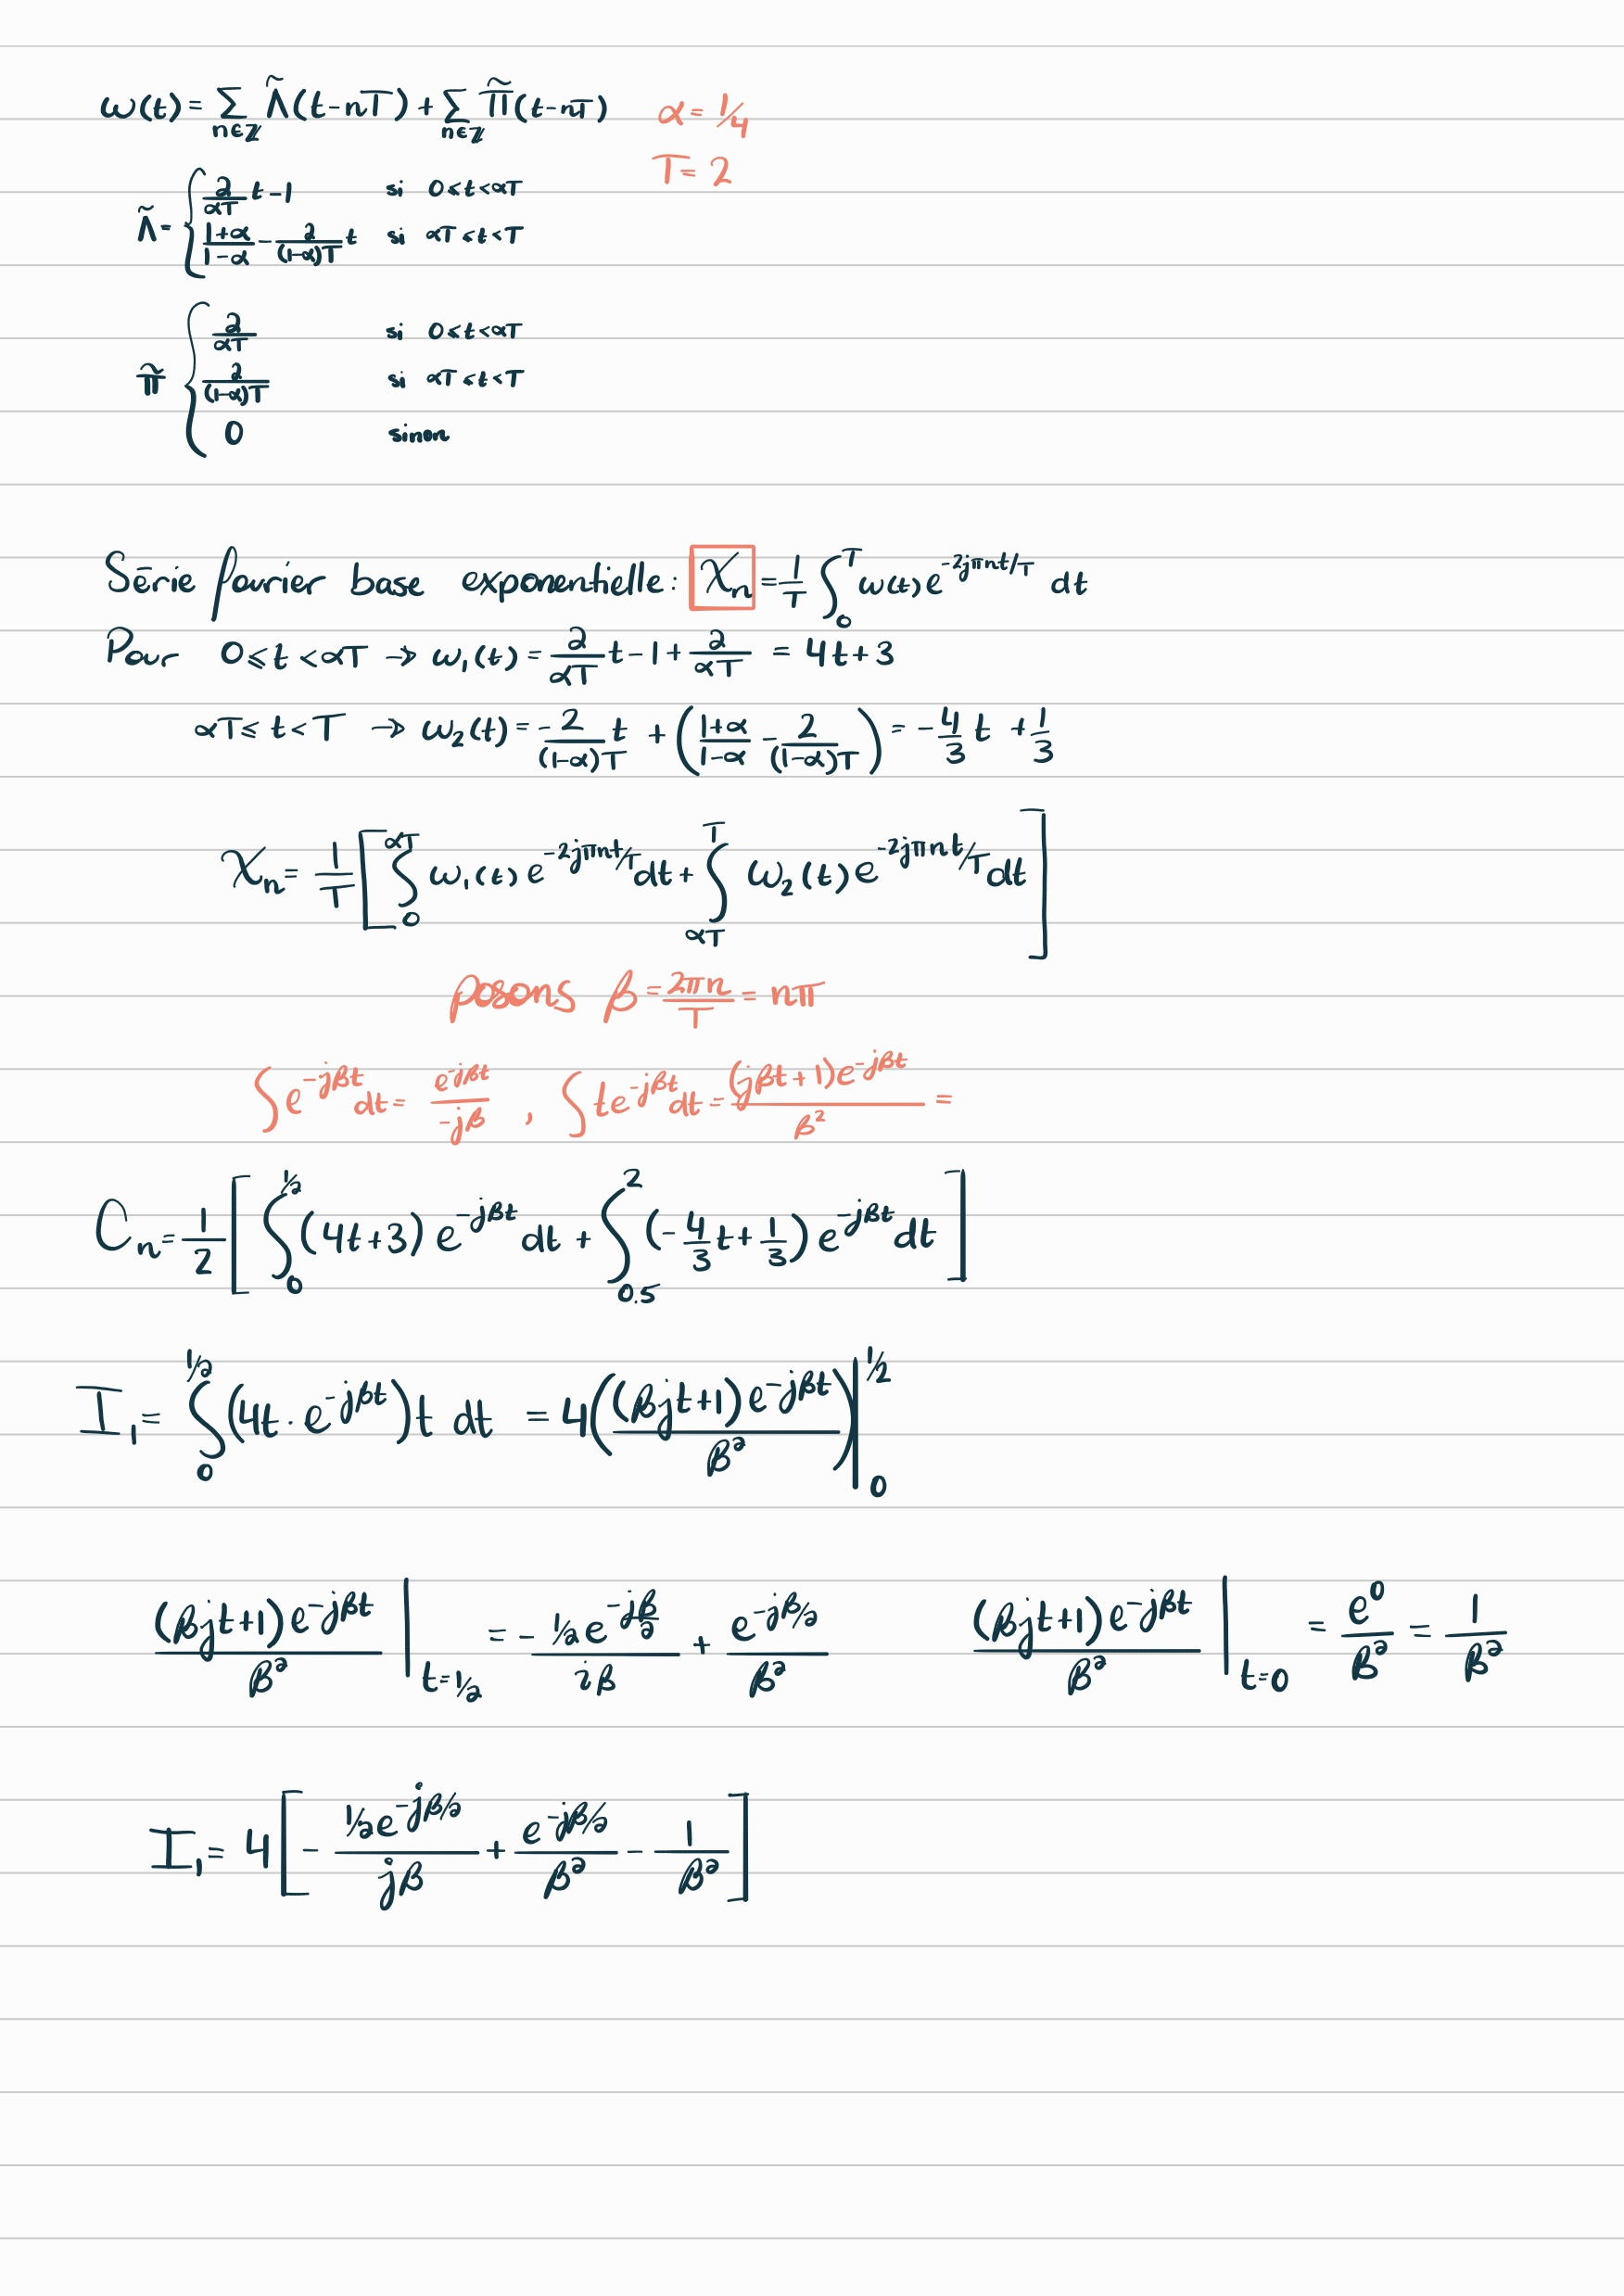

$\color{orange}{\text{e) [Texte]}}$ Faites-varier le paramètre $\alpha \in (0,1)$. Que se passe-t-il quand $\alpha$ tends vers 0 ou 1? Comment ce paramètre influence-t-il les harmoniques nulles?  $\color{red}{\textbf{(1pt/20)}}$

Quand alpha tend vers 0 ou vers 1 X_0 (composant DC) reste nul et les seules annulations sont celles où n fois alpha est un entier.Plus alpha est proche de 0 ou de 1 plus il faut des indices n élevés pour annulée des termes. Si alpha est irrationnel aucune annulation pour n non nul.